In [265]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns


In [266]:

df_bank_add_full = pd.read_csv('bank-additional-full.csv' ,delimiter = ';')

In [267]:
def datacleaning_terry(df):
    # replace "unknown" with NA
    df_new = df
    df_new = df_new.replace("unknown", np.nan)
    
    # define target variables
    missing_columns = df_new.columns[df_new.isnull().any()]
    
    # define independent columns and target columns
    df_not_missing = df_new[~df_new[missing_columns].isna().any(axis = 1)]
    df_missing = df_new[df_new[missing_columns].isnull().any(axis=1)]

    # define x variable for training data
    x = df_not_missing.drop(columns = missing_columns)
    x = x.drop(columns = ['y','poutcome'])
    x = pd.get_dummies(x, columns=x.select_dtypes(include=['object']).columns) 

    # define x variable for testing data
    x_missing = df_missing.drop(columns = missing_columns)
    x_missing = x_missing.drop(columns = ['y','poutcome'])
    x_missing = pd.get_dummies(x_missing, columns=x_missing.select_dtypes(include=['object']).columns) 
    
    # Predict and fill the value for NA, one column at a time, for all target columns
    for column in missing_columns:
        print(column)
        df_toFill = df_new[df_new[column].isna()]

        # define y variable for training data, and the column to be filled
        y = df_not_missing[column]
        
        
        #define the column to be filled
        y_missing = df_missing[column]
        
        
        
        model = RandomForestClassifier()
        model.fit(x, y)
        
        missing_values_predicted = model.predict(x_missing)             
        
        columns_to_fill = column
        y_missing = np.where(y_missing.isna(), missing_values_predicted, y_missing)
        
        df_missing[column] = y_missing
        
    #concat the data back together, drop the "poutcome" column, and remove duplicate rows
    df = pd.concat([df_not_missing, df_missing])
    df = df.sort_index()
    #df = df.drop(columns = "poutcome")
    df = df.drop_duplicates()
    
    return df

In [268]:
df = datacleaning_terry(df_bank_add_full)

job


C:\Users\deadl\AppData\Local\Temp\ipykernel_21220\3384208301.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_missing[column] = y_missing


marital


C:\Users\deadl\AppData\Local\Temp\ipykernel_21220\3384208301.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_missing[column] = y_missing


education


C:\Users\deadl\AppData\Local\Temp\ipykernel_21220\3384208301.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_missing[column] = y_missing


default


C:\Users\deadl\AppData\Local\Temp\ipykernel_21220\3384208301.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_missing[column] = y_missing


housing


C:\Users\deadl\AppData\Local\Temp\ipykernel_21220\3384208301.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_missing[column] = y_missing


loan


C:\Users\deadl\AppData\Local\Temp\ipykernel_21220\3384208301.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_missing[column] = y_missing


In [269]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# Overview of Each Column

<AxesSubplot:xlabel='y'>

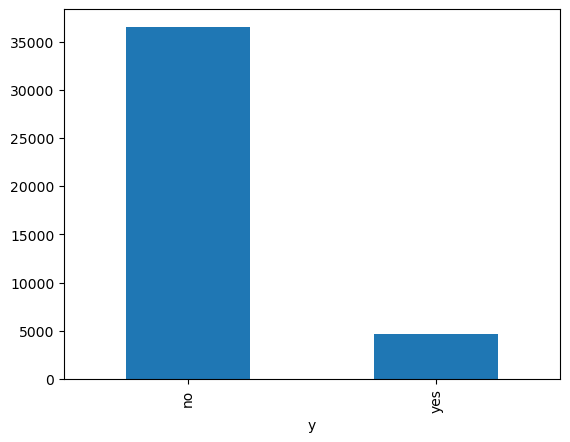

In [270]:
df.groupby('y')['y'].count().plot(kind = 'bar')

<AxesSubplot:xlabel='age'>

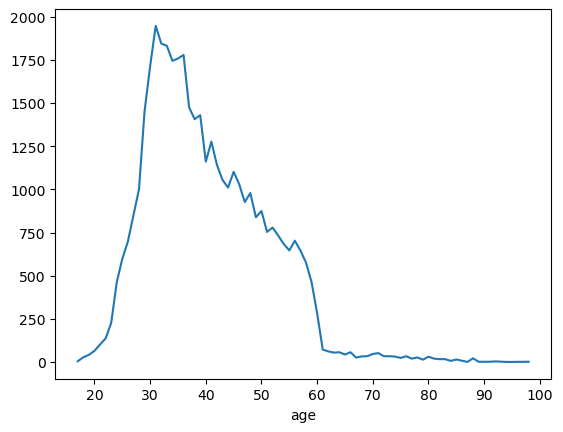

In [271]:
df.groupby('age')['age'].count().plot() 

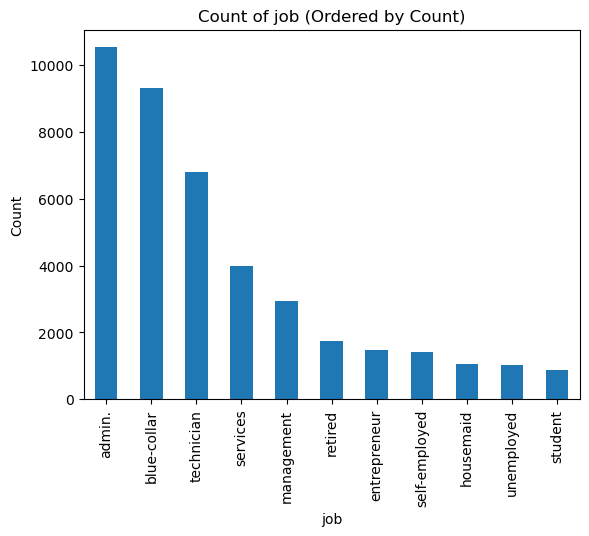

In [272]:
job_counts = df['job'].value_counts()

job_counts = job_counts.sort_values(ascending=False)

ax = job_counts.plot(kind='bar')

plt.xlabel('job')
plt.ylabel('Count')
plt.title('Count of job (Ordered by Count)')

plt.show() 

<AxesSubplot:xlabel='marital'>

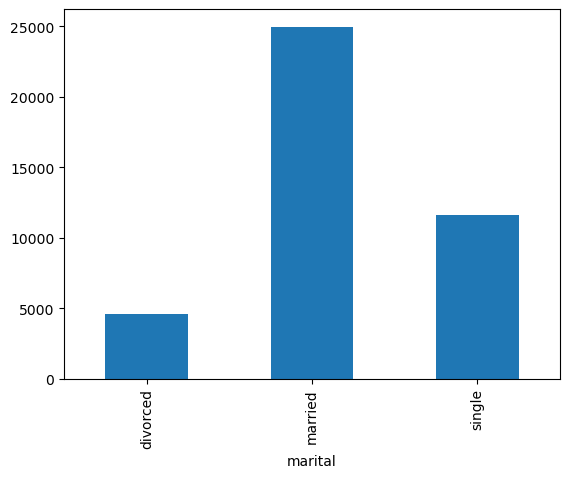

In [273]:
df.groupby('marital')['marital'].count().plot(kind = 'bar') 

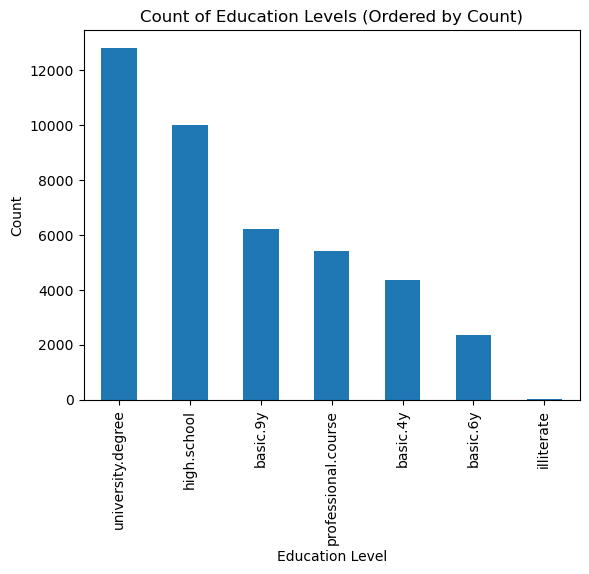

In [315]:
education_counts = df['education'].value_counts()


education_counts = education_counts.sort_values(ascending=False)


ax = education_counts.plot(kind='bar')


plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Count of Education Levels (Ordered by Count)')


plt.show() 

<AxesSubplot:xlabel='default'>

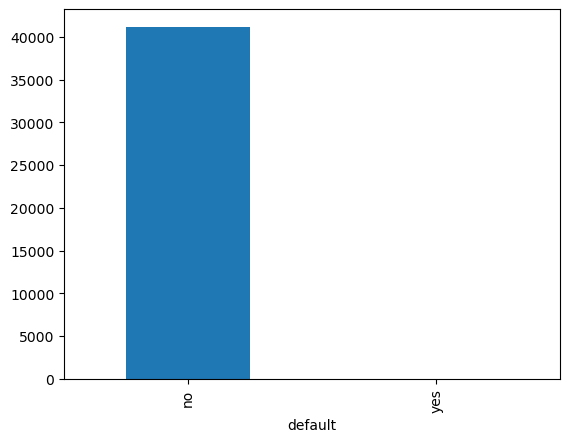

In [275]:
df.groupby('default')['default'].count().plot(kind = 'bar') 

<AxesSubplot:xlabel='housing'>

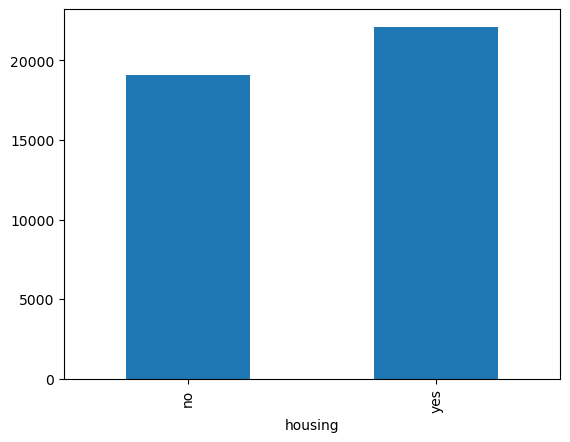

In [276]:
df.groupby('housing')['housing'].count().plot(kind = 'bar') 

<AxesSubplot:xlabel='loan'>

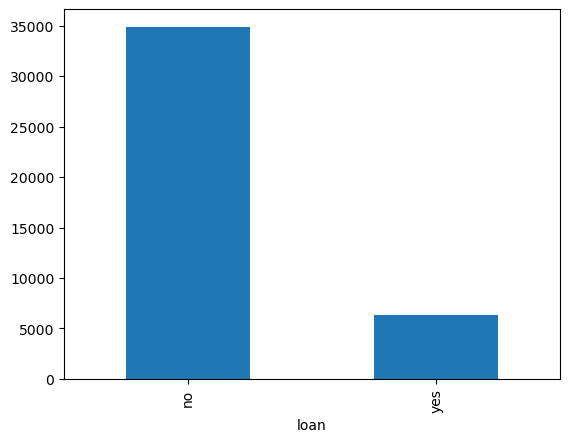

In [277]:
df.groupby('loan')['loan'].count().plot(kind = 'bar')


<AxesSubplot:xlabel='contact'>

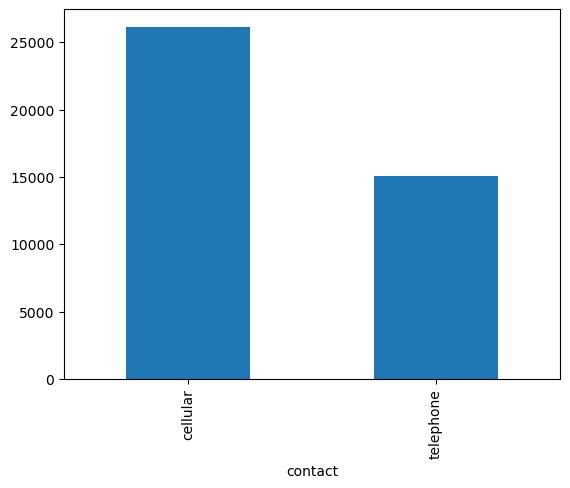

In [278]:

df.groupby('contact')['contact'].count().plot(kind = 'bar')

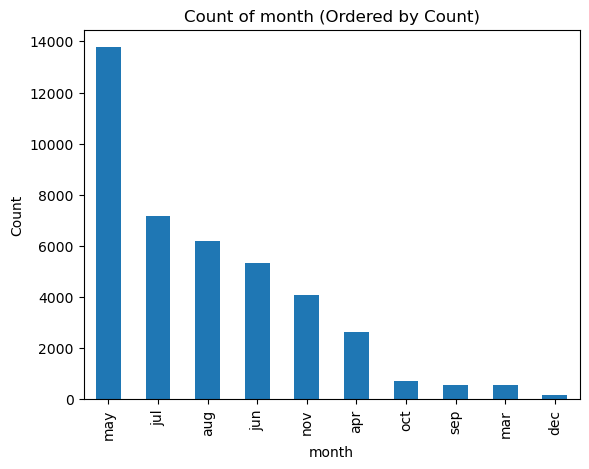

In [279]:
month_counts = df['month'].value_counts()

month_counts = month_counts.sort_values(ascending=False)

ax = month_counts.plot(kind='bar')

plt.xlabel('month')
plt.ylabel('Count')
plt.title('Count of month (Ordered by Count)')

plt.show()

<AxesSubplot:xlabel='day_of_week'>

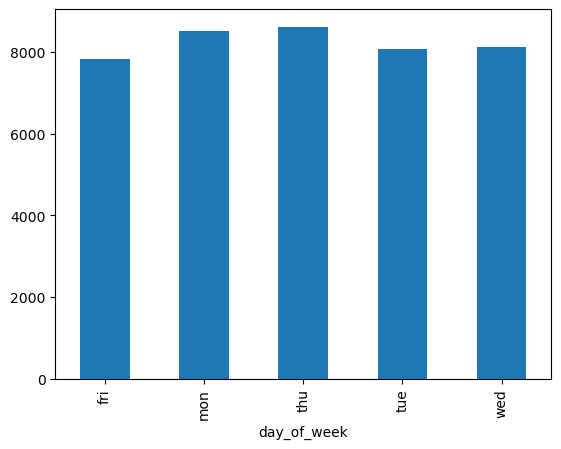

In [280]:
df.groupby('day_of_week')['day_of_week'].count().plot(kind = 'bar')

<AxesSubplot:xlabel='duration'>

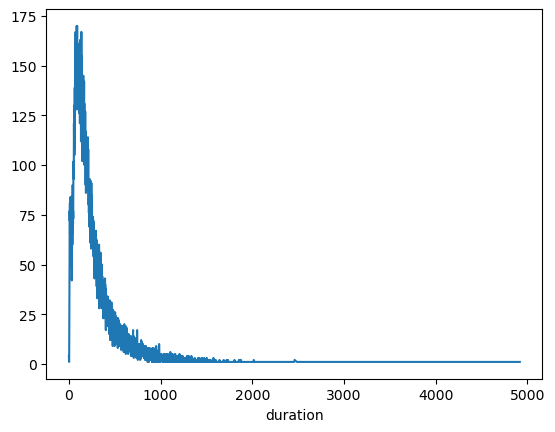

In [281]:
df.groupby('duration')['duration'].count().plot()

<AxesSubplot:xlabel='campaign'>

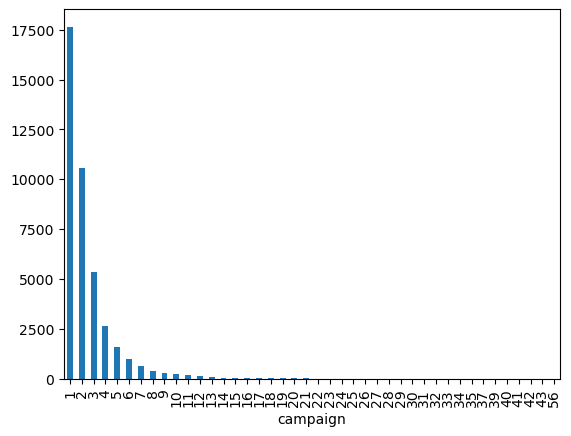

In [282]:

df.groupby('campaign')['campaign'].count().plot(kind = 'bar')

<AxesSubplot:xlabel='pdays'>

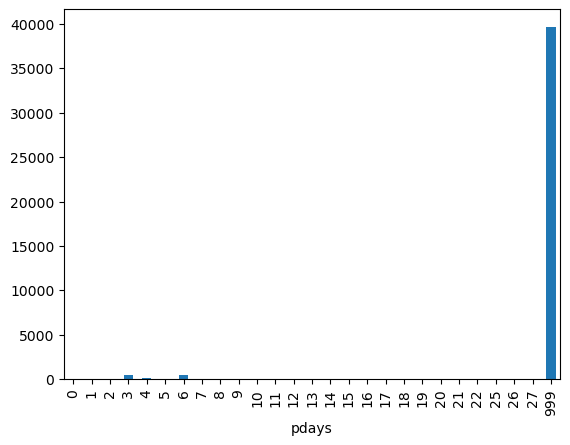

In [283]:

df.groupby('pdays')['pdays'].count().plot(kind = 'bar')

<AxesSubplot:xlabel='previous'>

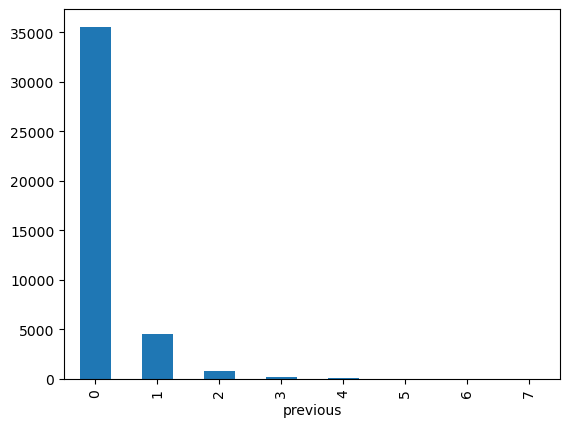

In [284]:

df.groupby('previous')['previous'].count().plot(kind = 'bar')

<AxesSubplot:xlabel='poutcome'>

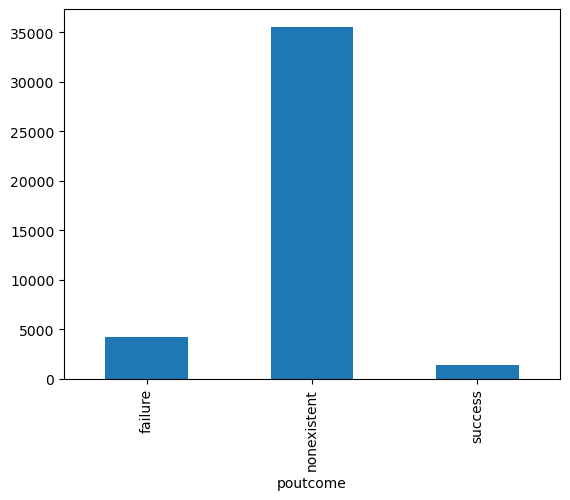

In [285]:

df.groupby('poutcome')['poutcome'].count().plot(kind = 'bar')


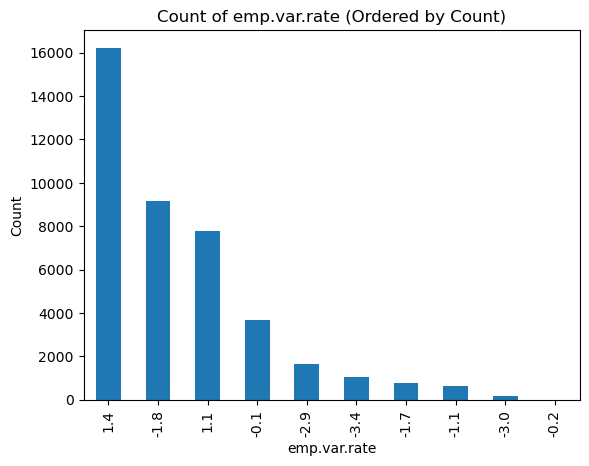

In [316]:
emp_var_rate_counts = df['emp.var.rate'].value_counts()


emp_var_rate_counts = emp_var_rate_counts.sort_values(ascending=False)


ax = emp_var_rate_counts.plot(kind='bar')


plt.xlabel('emp.var.rate')
plt.ylabel('Count')
plt.title('Count of emp.var.rate (Ordered by Count)')


plt.show()

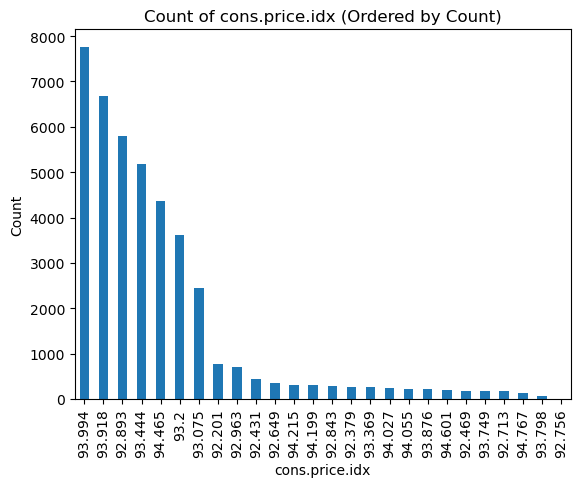

In [317]:
cons_price_idx_counts = df['cons.price.idx'].value_counts()


cons_price_idx_counts = cons_price_idx_counts.sort_values(ascending=False)


ax = cons_price_idx_counts.plot(kind='bar')


plt.xlabel('cons.price.idx')
plt.ylabel('Count')
plt.title('Count of cons.price.idx (Ordered by Count)')


plt.show()

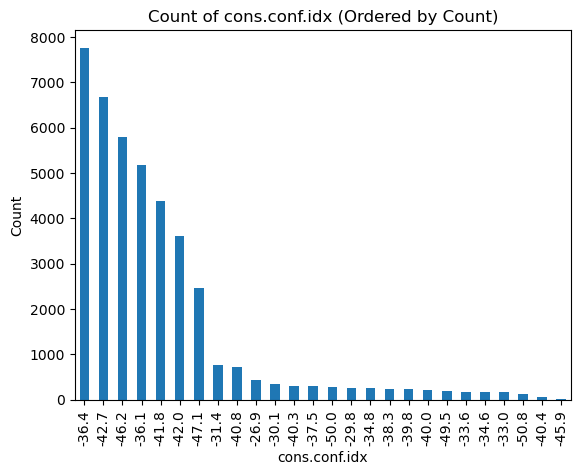

In [318]:
cons_conf_idx_counts = df['cons.conf.idx'].value_counts()


cons_conf_idx_counts = cons_conf_idx_counts.sort_values(ascending=False)


ax = cons_conf_idx_counts.plot(kind='bar')


plt.xlabel('cons.conf.idx')
plt.ylabel('Count')
plt.title('Count of cons.conf.idx (Ordered by Count)')


plt.show()

<AxesSubplot:xlabel='euribor3m'>

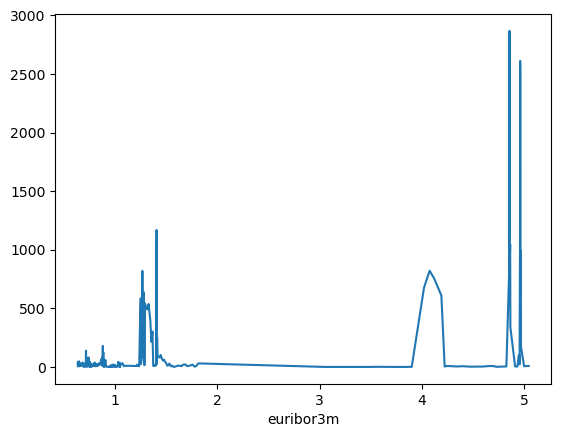

In [289]:
df.groupby('euribor3m')['euribor3m'].count().plot()

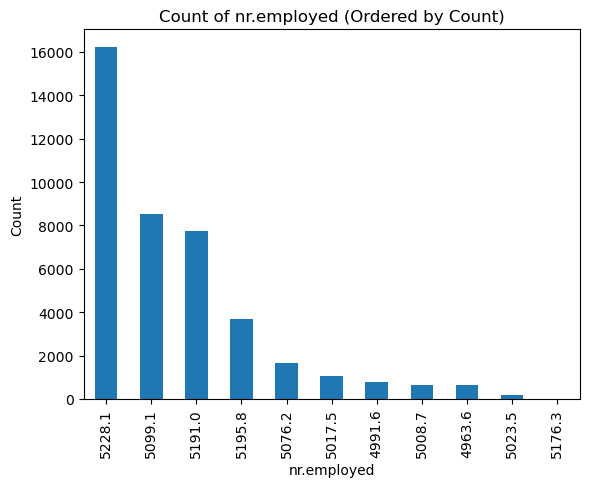

In [319]:
nr_employed_counts = df['nr.employed'].value_counts()

nr_employed_counts = nr_employed_counts.sort_values(ascending=False)


ax = nr_employed_counts.plot(kind='bar')


plt.xlabel('nr.employed')
plt.ylabel('Count')
plt.title('Count of nr.employed (Ordered by Count)')


plt.show()

In [291]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


The majority of ages falls between 25 and 60

There are significantly less people who are not hired by others

Most people are married

Most peope have university degree or high school degree

Vast majority of people have no credit in default

More than 50% of people has house loan

The majority of people don't have a personal loan

Most people have cellular as their method of contact

Number of people last contacted in the month of May is significantly mroe than the number in any other month

Most people are not previously contacted

# Each Independent variable (column) vs target variable

Age

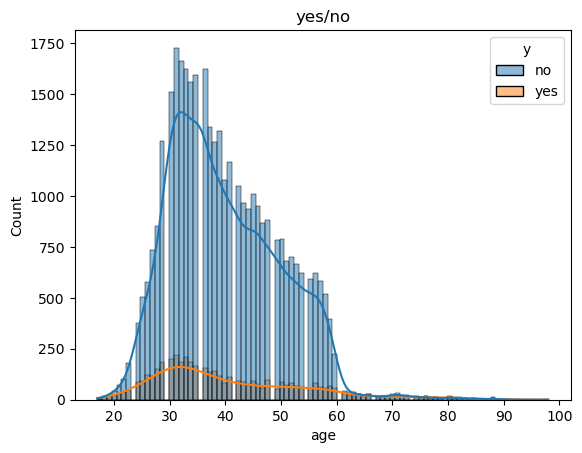

In [292]:
sns.histplot(data=df, x='age', hue='y', kde=True)
plt.xlabel('age')
plt.title('yes/no')
plt.show()

In [293]:
len(df[df.y == 'yes'])/len(df)

0.11266818866274833

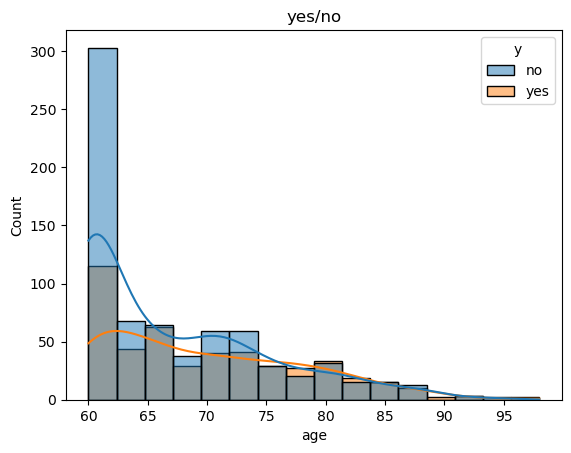

In [320]:
filtered_df = df[df['age'] >= 60]


sns.histplot(data=filtered_df, x='age', hue='y', kde=True)
plt.xlabel('age')
plt.title('yes/no')
plt.show()

In [296]:
print('probabilty of purchase for people whose age is >= 60:' )
len(filtered_df[filtered_df.y == 'yes'])/len(filtered_df)

probabilty of purchase for people whose age is >= 60:


0.3959731543624161

In [297]:
filtered_df_under60 = df[df['age'] < 60]


In [298]:
print('probabilty of purchase for people whose age is < 60:' )
len(filtered_df_under60[filtered_df_under60.y == 'yes'])/len(filtered_df_under60)

probabilty of purchase for people whose age is < 60:


0.10422189985493473

Job

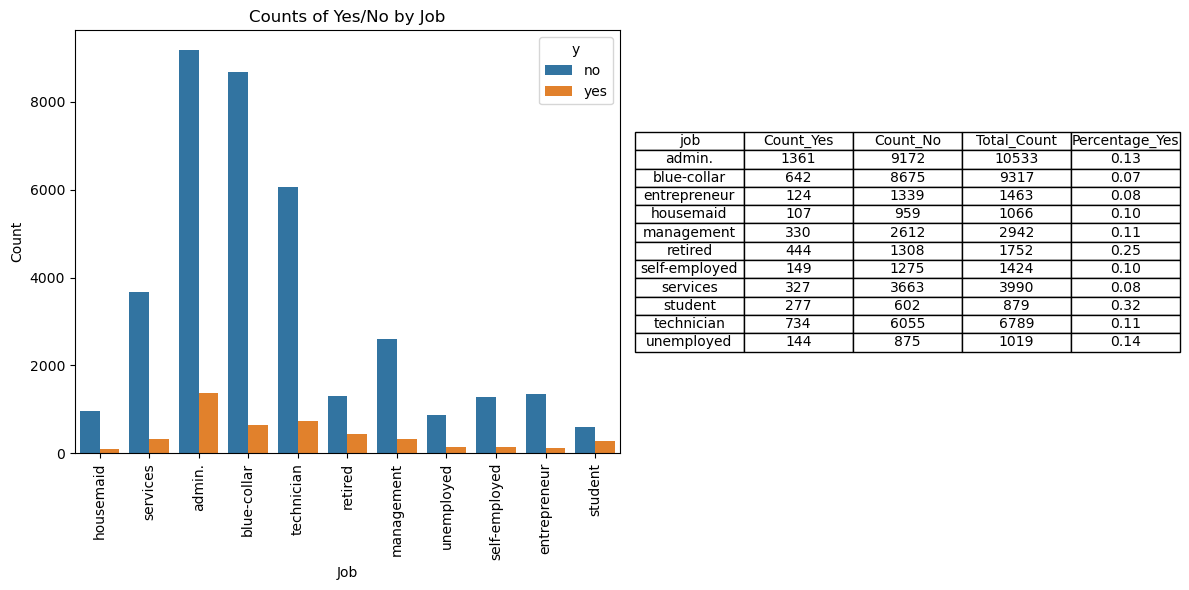

In [321]:
aggregations = {
    'Count_Yes': lambda x: (x == 'yes').sum(),
    'Count_No': lambda x: (x == 'no').sum(),
    'Total_Count': 'count',
    'Percentage_Yes': lambda x: (x == 'yes').sum() / x.count()
}


result = df.groupby('job')['y'].agg(**aggregations)


result = result.reset_index()

result['Percentage_Yes'] = result['Percentage_Yes'].apply(lambda x: f'{x:.2f}')


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))


sns.countplot(data=df, x='job', hue='y', ax=ax1)


ax1.set_xlabel('Job')
ax1.set_ylabel('Count')
ax1.set_title('Counts of Yes/No by Job')
ax1.tick_params(axis='x', rotation=90)  


ax2.axis('off')  
table = ax2.table(cellText=result.values, colLabels=result.columns, cellLoc='center', loc='center')


table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.2)


plt.tight_layout()
plt.show()

Marital

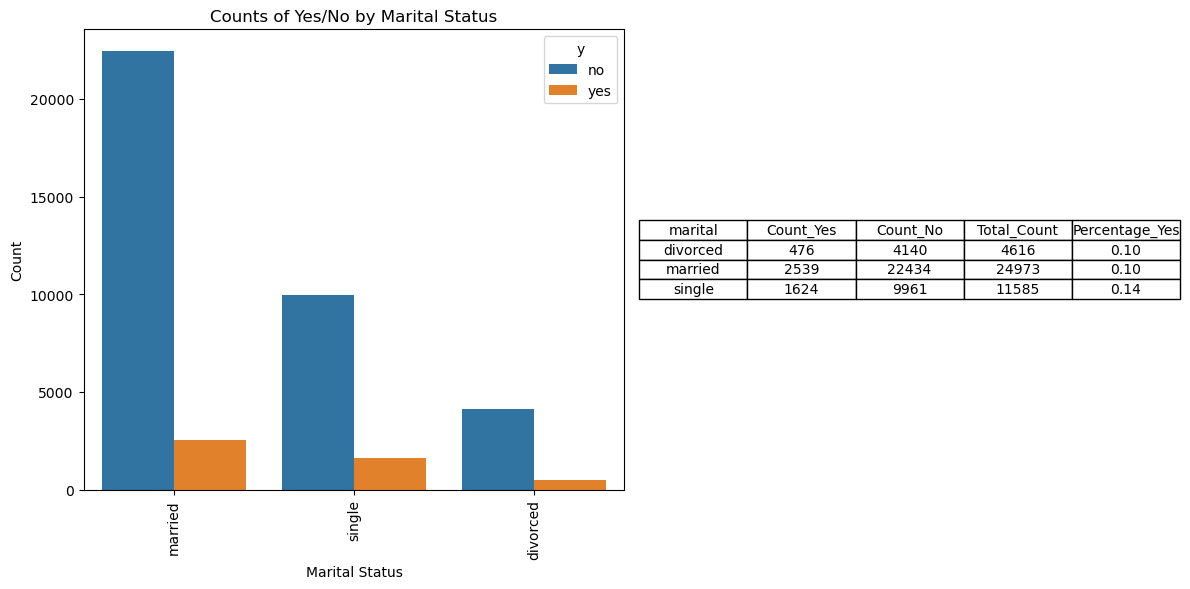

In [322]:
aggregations = {
    'Count_Yes': lambda x: (x == 'yes').sum(),
    'Count_No': lambda x: (x == 'no').sum(),
    'Total_Count': 'count',
    'Percentage_Yes': lambda x: (x == 'yes').sum() / x.count()
}


result = df.groupby('marital')['y'].agg(**aggregations)

result = result.reset_index()


result['Percentage_Yes'] = result['Percentage_Yes'].apply(lambda x: f'{x:.2f}')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))


sns.countplot(data=df, x='marital', hue='y', ax=ax1)

ax1.set_xlabel('Marital Status')
ax1.set_ylabel('Count')
ax1.set_title('Counts of Yes/No by Marital Status')
ax1.tick_params(axis='x', rotation=90)  


ax2.axis('off')  
table = ax2.table(cellText=result.values, colLabels=result.columns, cellLoc='center', loc='center')


table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.2)

plt.tight_layout()
plt.show()

Education

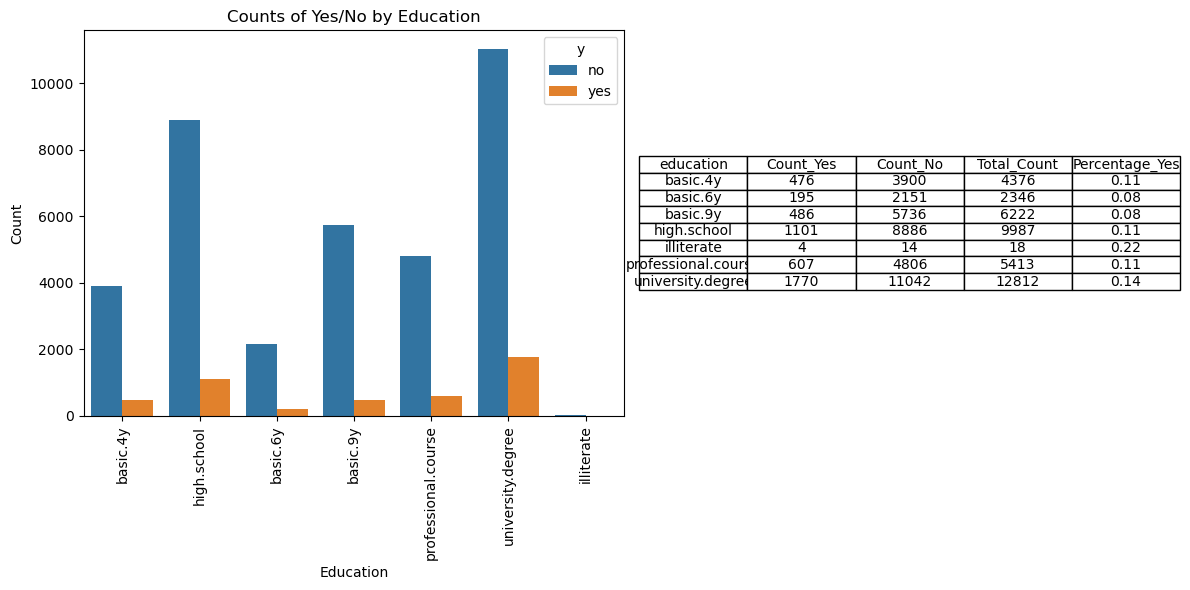

In [323]:
aggregations = {
    'Count_Yes': lambda x: (x == 'yes').sum(),
    'Count_No': lambda x: (x == 'no').sum(),
    'Total_Count': 'count',
    'Percentage_Yes': lambda x: (x == 'yes').sum() / x.count()
}


result = df.groupby('education')['y'].agg(**aggregations)


result = result.reset_index()

result['Percentage_Yes'] = result['Percentage_Yes'].apply(lambda x: f'{x:.2f}')


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))


sns.countplot(data=df, x='education', hue='y', ax=ax1)


ax1.set_xlabel('Education')
ax1.set_ylabel('Count')
ax1.set_title('Counts of Yes/No by Education')
ax1.tick_params(axis='x', rotation=90) 


ax2.axis('off')  
table = ax2.table(cellText=result.values, colLabels=result.columns, cellLoc='center', loc='center')


table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.2)

# Show the subplots
plt.tight_layout()
plt.show()

Default

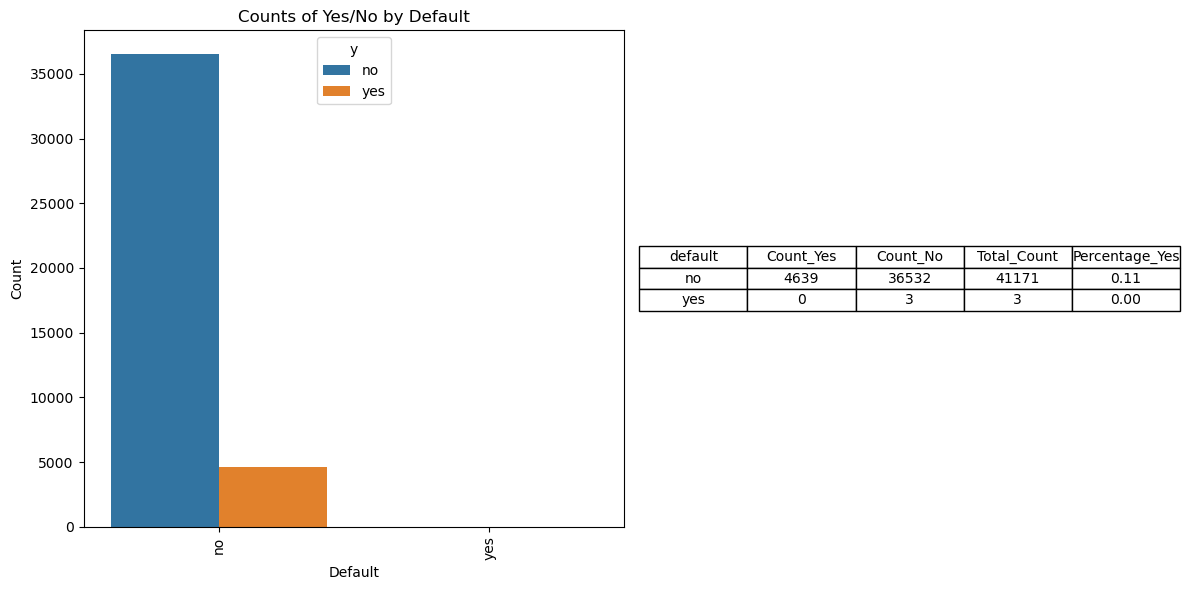

In [324]:
aggregations = {
    'Count_Yes': lambda x: (x == 'yes').sum(),
    'Count_No': lambda x: (x == 'no').sum(),
    'Total_Count': 'count',
    'Percentage_Yes': lambda x: (x == 'yes').sum() / x.count()
}


result = df.groupby('default')['y'].agg(**aggregations)


result = result.reset_index()


result['Percentage_Yes'] = result['Percentage_Yes'].apply(lambda x: f'{x:.2f}')


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(data=df, x='default', hue='y', ax=ax1)

ax1.set_xlabel('Default')
ax1.set_ylabel('Count')
ax1.set_title('Counts of Yes/No by Default')
ax1.tick_params(axis='x', rotation=90)  


ax2.axis('off')  
table = ax2.table(cellText=result.values, colLabels=result.columns, cellLoc='center', loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.2)

plt.tight_layout()
plt.show()

Housing

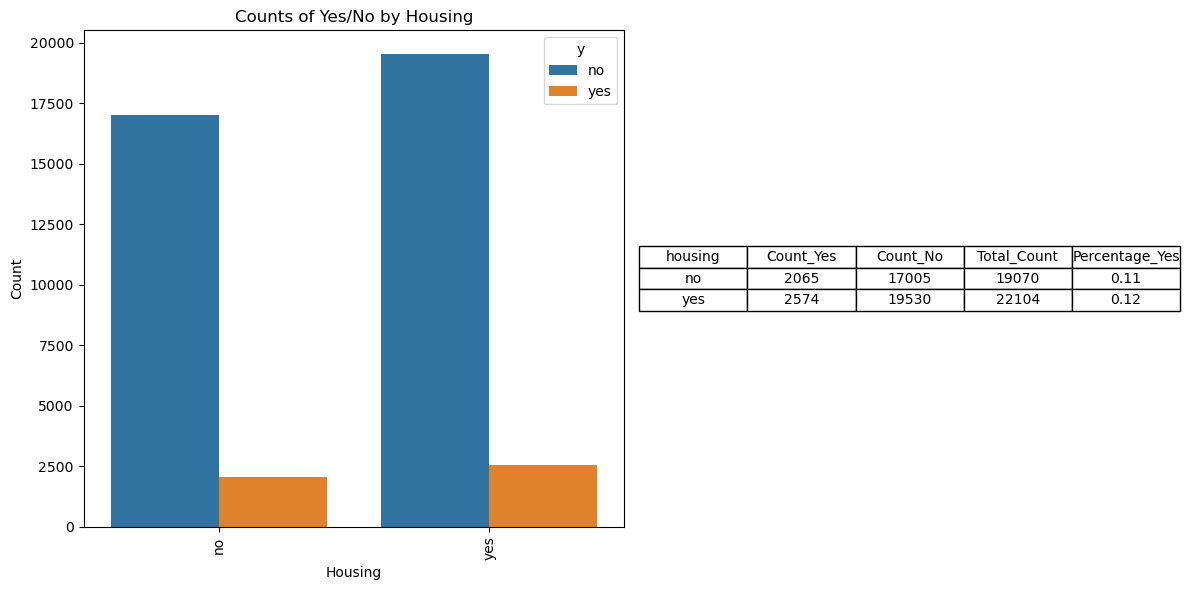

In [325]:
aggregations = {
    'Count_Yes': lambda x: (x == 'yes').sum(),
    'Count_No': lambda x: (x == 'no').sum(),
    'Total_Count': 'count',
    'Percentage_Yes': lambda x: (x == 'yes').sum() / x.count()
}

result = df.groupby('housing')['y'].agg(**aggregations)


result = result.reset_index()


result['Percentage_Yes'] = result['Percentage_Yes'].apply(lambda x: f'{x:.2f}')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(data=df, x='housing', hue='y', ax=ax1)


ax1.set_xlabel('Housing')
ax1.set_ylabel('Count')
ax1.set_title('Counts of Yes/No by Housing')
ax1.tick_params(axis='x', rotation=90)  


ax2.axis('off')  
table = ax2.table(cellText=result.values, colLabels=result.columns, cellLoc='center', loc='center')


table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.2)

plt.tight_layout()
plt.show()

Loan

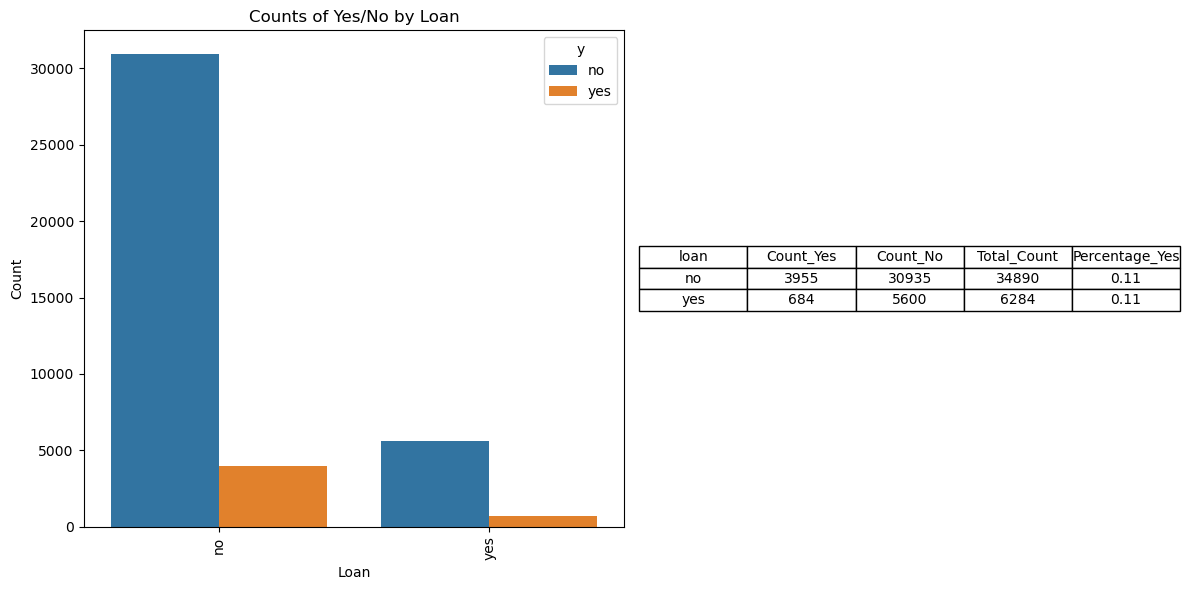

In [326]:
aggregations = {
    'Count_Yes': lambda x: (x == 'yes').sum(),
    'Count_No': lambda x: (x == 'no').sum(),
    'Total_Count': 'count',
    'Percentage_Yes': lambda x: (x == 'yes').sum() / x.count()
}


result = df.groupby('loan')['y'].agg(**aggregations)


result = result.reset_index()


result['Percentage_Yes'] = result['Percentage_Yes'].apply(lambda x: f'{x:.2f}')


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(data=df, x='loan', hue='y', ax=ax1)


ax1.set_xlabel('Loan')
ax1.set_ylabel('Count')
ax1.set_title('Counts of Yes/No by Loan')
ax1.tick_params(axis='x', rotation=90)  


ax2.axis('off')  
table = ax2.table(cellText=result.values, colLabels=result.columns, cellLoc='center', loc='center')


table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.2)


plt.tight_layout()
plt.show()

Contact

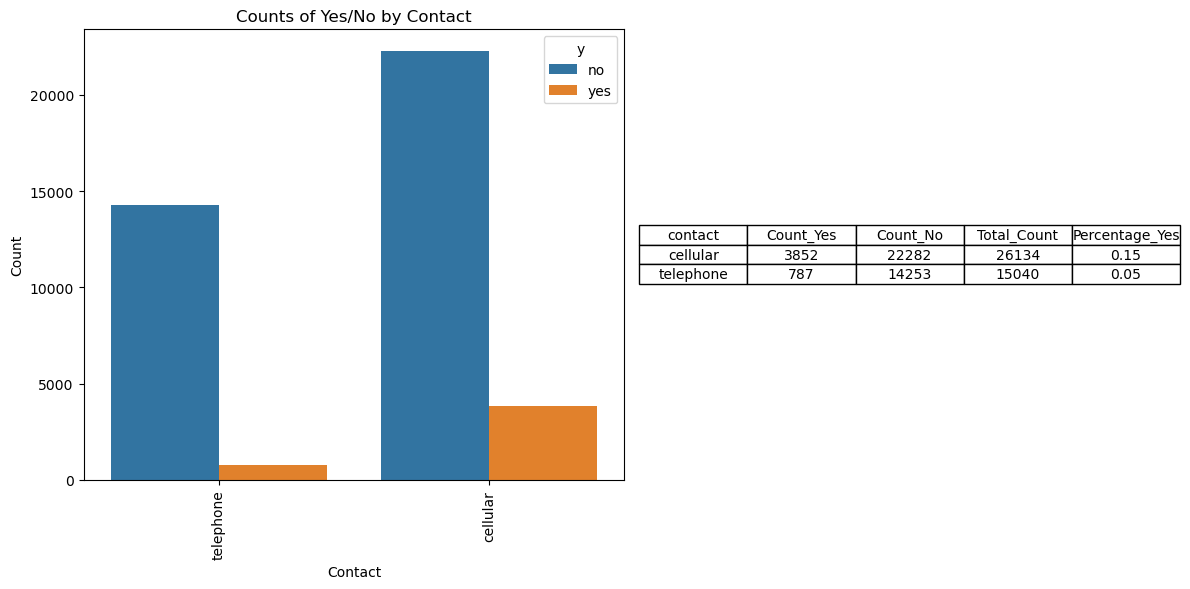

In [327]:
aggregations = {
    'Count_Yes': lambda x: (x == 'yes').sum(),
    'Count_No': lambda x: (x == 'no').sum(),
    'Total_Count': 'count',
    'Percentage_Yes': lambda x: (x == 'yes').sum() / x.count()
}


result = df.groupby('contact')['y'].agg(**aggregations)


result = result.reset_index()


result['Percentage_Yes'] = result['Percentage_Yes'].apply(lambda x: f'{x:.2f}')


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))


sns.countplot(data=df, x='contact', hue='y', ax=ax1)


ax1.set_xlabel('Contact')
ax1.set_ylabel('Count')
ax1.set_title('Counts of Yes/No by Contact')
ax1.tick_params(axis='x', rotation=90) 


ax2.axis('off')  
table = ax2.table(cellText=result.values, colLabels=result.columns, cellLoc='center', loc='center')


table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.2)


plt.tight_layout()
plt.show()

Month

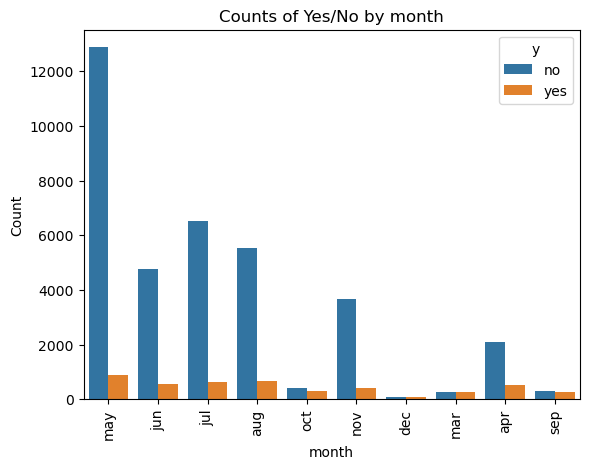

In [328]:
sns.countplot(data=df, x='month', hue='y')


plt.xlabel('month')
plt.ylabel('Count')
plt.title('Counts of Yes/No by month')


plt.xticks(rotation=90)  
plt.show()

day_of_week

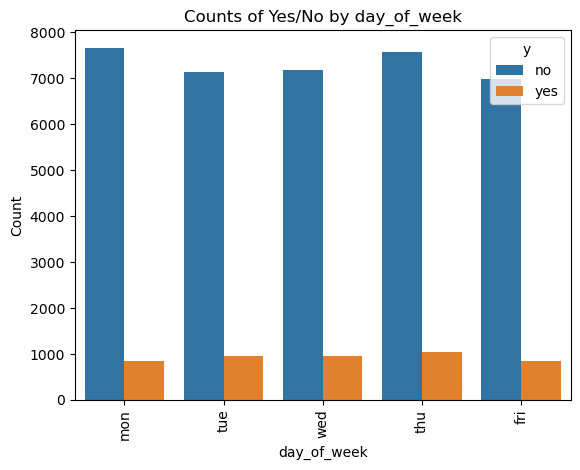

In [329]:
sns.countplot(data=df, x='day_of_week', hue='y')


plt.xlabel('day_of_week')
plt.ylabel('Count')
plt.title('Counts of Yes/No by day_of_week')


plt.xticks(rotation=90) 
plt.show()

duration

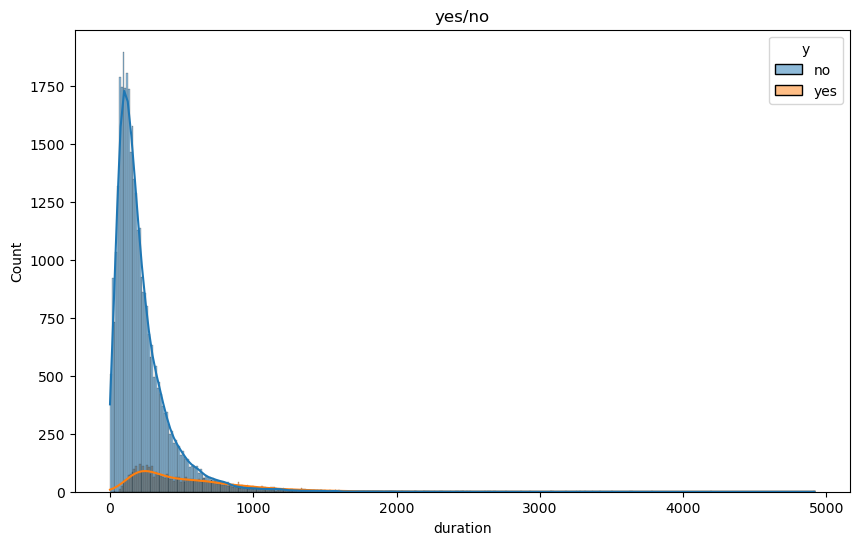

In [330]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='duration', hue='y', kde=True)
plt.xlabel('duration')
plt.title('yes/no')
plt.show()




campaign

In [331]:
aggregations = {
    'Count_Yes': lambda x: (x == 'yes').sum(),
    'Count_No': lambda x: (x == 'no').sum(),
    'Total_Count': 'count',
    'Percentage_Yes': lambda x: (x == 'yes').sum() / x.count()
}


result = df.groupby('campaign')['y'].agg(**aggregations)


result = result.reset_index()


result

,campaign,Count_Yes,Count_No,Total_Count,Percentage_Yes
0,1,2299,15333,17632,0.130388
1,2,1211,9357,10568,0.114591
2,3,574,4766,5340,0.107491
3,4,249,2401,2650,0.093962
4,5,120,1479,1599,0.075047
5,6,75,904,979,0.076609
6,7,38,591,629,0.060413
7,8,17,383,400,0.042500
8,9,17,266,283,0.060071
9,10,12,213,225,0.053333


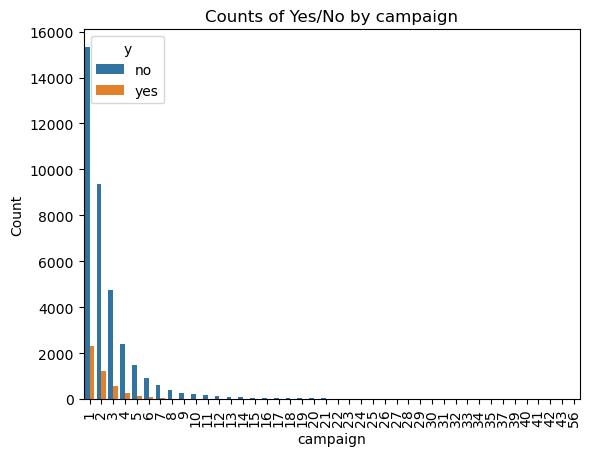

In [332]:
sns.countplot(data=df, x='campaign', hue='y')


plt.xlabel('campaign')
plt.ylabel('Count')
plt.title('Counts of Yes/No by campaign')


plt.xticks(rotation=90)  
plt.show()

pdays

In [341]:
aggregations = {
    'Count_Yes': lambda x: (x == 'yes').sum(),
    'Count_No': lambda x: (x == 'no').sum(),
    'Total_Count': 'count',
    'Percentage_Yes': lambda x: (x == 'yes').sum() / x.count()
}


result = df.groupby('pdays')['y'].agg(**aggregations)


result = result.reset_index()


result

,pdays,Count_Yes,Count_No,Total_Count,Percentage_Yes
0,0,10,5,15,0.666667
1,1,8,18,26,0.307692
2,2,37,24,61,0.606557
3,3,298,141,439,0.678815
4,4,63,55,118,0.533898
5,5,29,17,46,0.630435
6,6,289,123,412,0.701456
7,7,40,20,60,0.666667
8,8,12,6,18,0.666667
9,9,35,29,64,0.546875


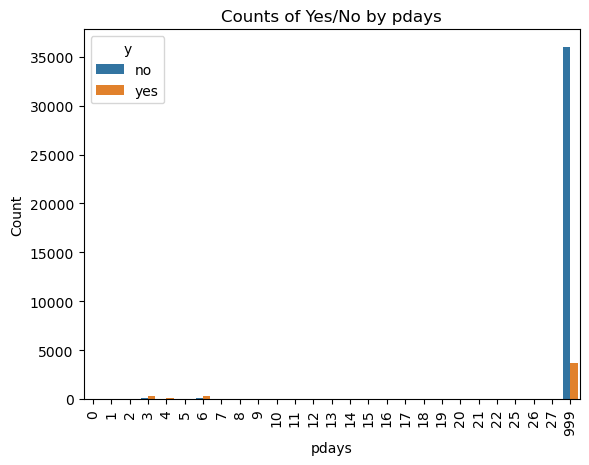

In [342]:
sns.countplot(data=df, x='pdays', hue='y')


plt.xlabel('pdays')
plt.ylabel('Count')
plt.title('Counts of Yes/No by pdays')


plt.xticks(rotation=90) 
plt.show()

In [312]:
df_map_mod = df_map[df_map.pdays != 999]

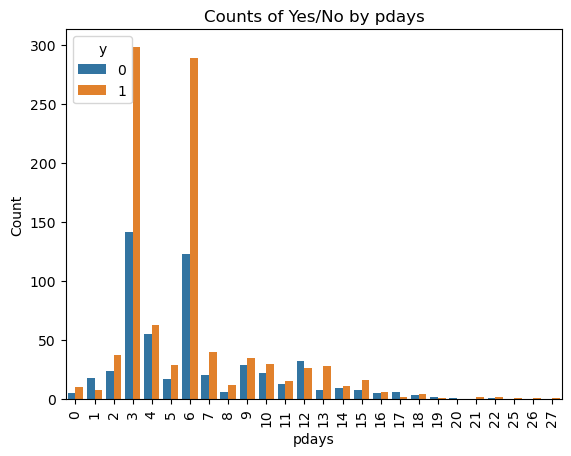

In [343]:
sns.countplot(data=df_map_mod, x='pdays', hue='y')


plt.xlabel('pdays')
plt.ylabel('Count')
plt.title('Counts of Yes/No by pdays')


plt.xticks(rotation=90)  
plt.show()

In [344]:
pearson_corr = df_map_mod['pdays'].corr(df_map_mod['y'])
pearson_corr  

-0.03522348402414881

previous

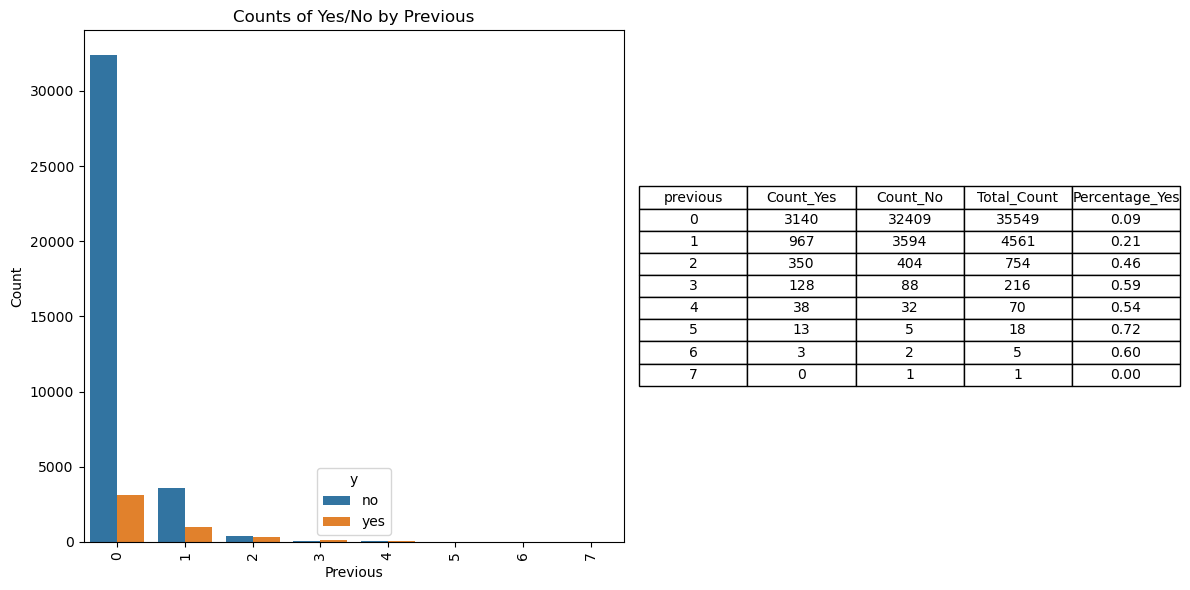

In [345]:
aggregations = {
    'Count_Yes': lambda x: (x == 'yes').sum(),
    'Count_No': lambda x: (x == 'no').sum(),
    'Total_Count': 'count',
    'Percentage_Yes': lambda x: (x == 'yes').sum() / x.count()
}


result = df.groupby('previous')['y'].agg(**aggregations)


result = result.reset_index()


result['Percentage_Yes'] = result['Percentage_Yes'].apply(lambda x: f'{x:.2f}')


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))


sns.countplot(data=df, x='previous', hue='y', ax=ax1)


ax1.set_xlabel('Previous')
ax1.set_ylabel('Count')
ax1.set_title('Counts of Yes/No by Previous')
ax1.tick_params(axis='x', rotation=90)  


ax2.axis('off')  
table = ax2.table(cellText=result.values, colLabels=result.columns, cellLoc='center', loc='center')


table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.2)


plt.tight_layout()
plt.show()

poutcome

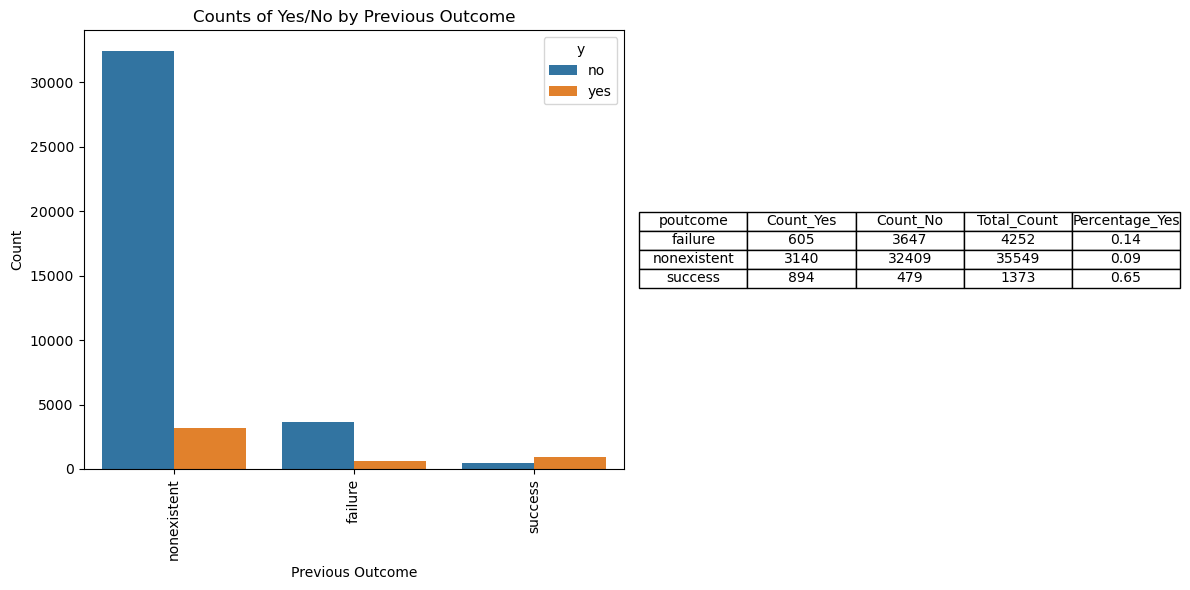

In [340]:
aggregations = {
    'Count_Yes': lambda x: (x == 'yes').sum(),
    'Count_No': lambda x: (x == 'no').sum(),
    'Total_Count': 'count',
    'Percentage_Yes': lambda x: (x == 'yes').sum() / x.count()
}


result = df.groupby('poutcome')['y'].agg(**aggregations)


result = result.reset_index()


result['Percentage_Yes'] = result['Percentage_Yes'].apply(lambda x: f'{x:.2f}')


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(data=df, x='poutcome', hue='y', ax=ax1)


ax1.set_xlabel('Previous Outcome')
ax1.set_ylabel('Count')
ax1.set_title('Counts of Yes/No by Previous Outcome')
ax1.tick_params(axis='x', rotation=90)  


ax2.axis('off')  
table = ax2.table(cellText=result.values, colLabels=result.columns, cellLoc='center', loc='center')


table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.2)

plt.tight_layout()
plt.show()

employment variation rate

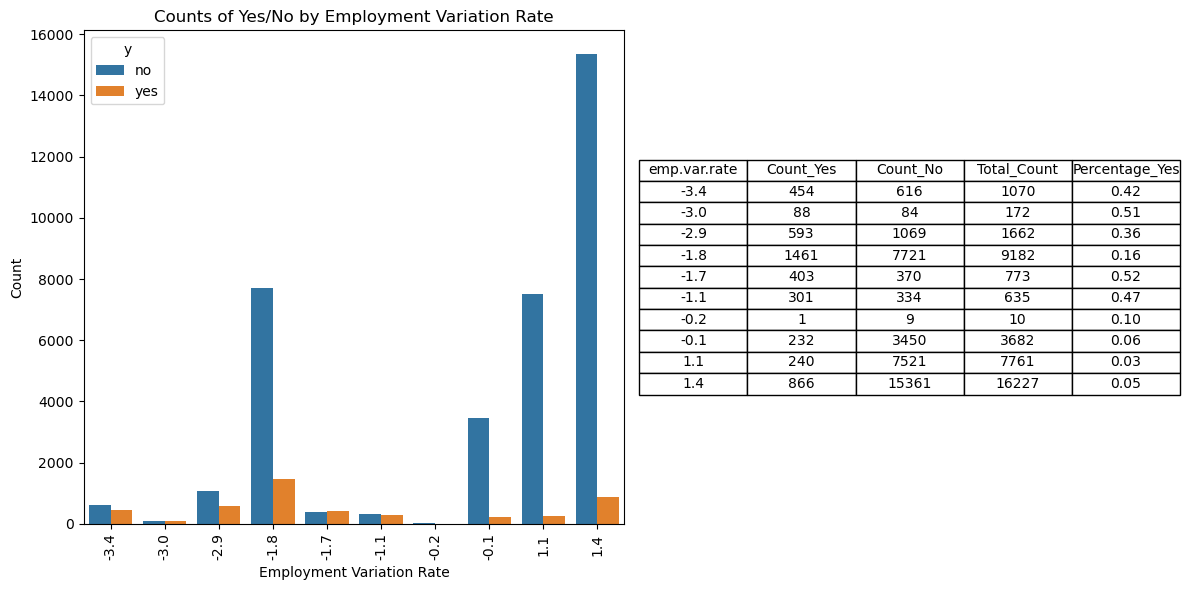

In [339]:
aggregations = {
    'Count_Yes': lambda x: (x == 'yes').sum(),
    'Count_No': lambda x: (x == 'no').sum(),
    'Total_Count': 'count',
    'Percentage_Yes': lambda x: (x == 'yes').sum() / x.count()
}


result = df.groupby('emp.var.rate')['y'].agg(**aggregations)


result = result.reset_index()


result['Percentage_Yes'] = result['Percentage_Yes'].apply(lambda x: f'{x:.2f}')


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))


sns.countplot(data=df, x='emp.var.rate', hue='y', ax=ax1)


ax1.set_xlabel('Employment Variation Rate')
ax1.set_ylabel('Count')
ax1.set_title('Counts of Yes/No by Employment Variation Rate')
ax1.tick_params(axis='x', rotation=90)  


ax2.axis('off') 
table = ax2.table(cellText=result.values, colLabels=result.columns, cellLoc='center', loc='center')


table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.2)


plt.tight_layout()
plt.show()

consumer price index

In [338]:
aggregations = {
    'Count_Yes': lambda x: (x == 'yes').sum(),
    'Count_No': lambda x: (x == 'no').sum(),
    'Total_Count': 'count',
    'Percentage_Yes': lambda x: (x == 'yes').sum() / x.count()
}


result = df.groupby('cons.price.idx')['y'].agg(**aggregations)


result = result.reset_index()


result

,cons.price.idx,Count_Yes,Count_No,Total_Count,Percentage_Yes
0,92.201,264,506,770,0.342857
1,92.379,106,161,267,0.397004
2,92.431,180,266,446,0.403587
3,92.469,65,112,177,0.367232
4,92.649,168,189,357,0.470588
5,92.713,88,84,172,0.511628
6,92.756,1,9,10,0.100000
7,92.843,126,156,282,0.446809
8,92.893,524,5269,5793,0.090454
9,92.963,264,451,715,0.369231


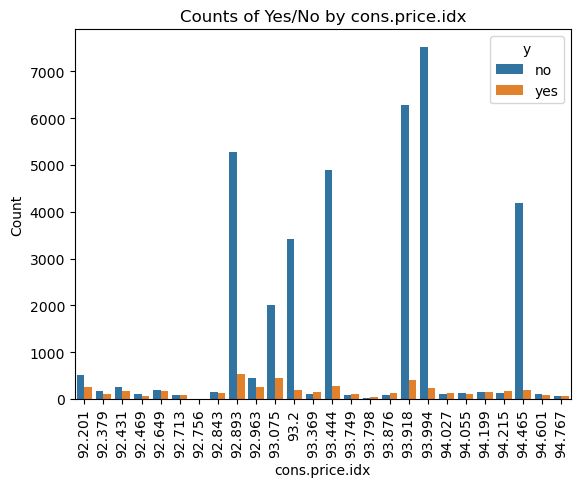

In [337]:
sns.countplot(data=df, x='cons.price.idx', hue='y')


plt.xlabel('cons.price.idx')
plt.ylabel('Count')
plt.title('Counts of Yes/No by cons.price.idx')


plt.xticks(rotation=90)  
plt.show()

In [256]:
pearson_corr = df_map['cons.price.idx'].corr(df_map['y'])
pearson_corr  

-0.13613105524454705

consumer confidence index

In [336]:
aggregations = {
    'Count_Yes': lambda x: (x == 'yes').sum(),
    'Count_No': lambda x: (x == 'no').sum(),
    'Total_Count': 'count',
    'Percentage_Yes': lambda x: (x == 'yes').sum() / x.count()
}


result = df.groupby('cons.conf.idx')['y'].agg(**aggregations)


result = result.reset_index()


result

,cons.conf.idx,Count_Yes,Count_No,Total_Count,Percentage_Yes
0,-50.8,58,70,128,0.453125
1,-50.0,126,156,282,0.446809
2,-49.5,93,111,204,0.455882
3,-47.1,442,2015,2457,0.179894
4,-46.2,524,5269,5793,0.090454
5,-45.9,1,9,10,0.100000
6,-42.7,407,6274,6681,0.060919
7,-42.0,190,3425,3615,0.052559
8,-41.8,188,4186,4374,0.042981
9,-40.8,264,451,715,0.369231


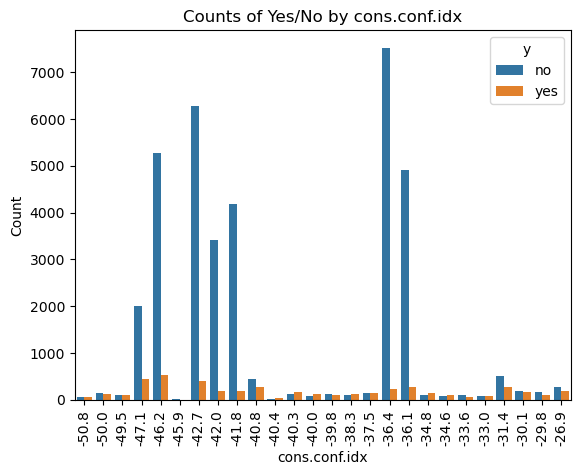

In [335]:
sns.countplot(data=df, x='cons.conf.idx', hue='y')


plt.xlabel('cons.conf.idx')
plt.ylabel('Count')
plt.title('Counts of Yes/No by cons.conf.idx')


plt.xticks(rotation=90)  
plt.show()

In [257]:
pearson_corr = df_map['cons.conf.idx'].corr(df_map['y'])
pearson_corr  

0.05481901729509181

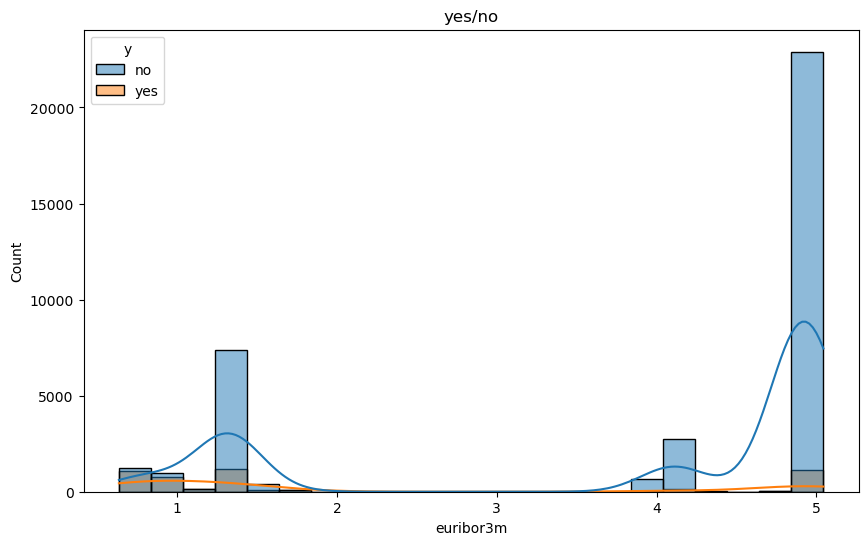

In [92]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='euribor3m', hue='y', kde=True)
plt.xlabel('euribor3m')
plt.title('yes/no')
plt.show()

In [258]:
pearson_corr = df_map['euribor3m'].corr(df_map['y'])
pearson_corr  

-0.30773260912407135

number of employees

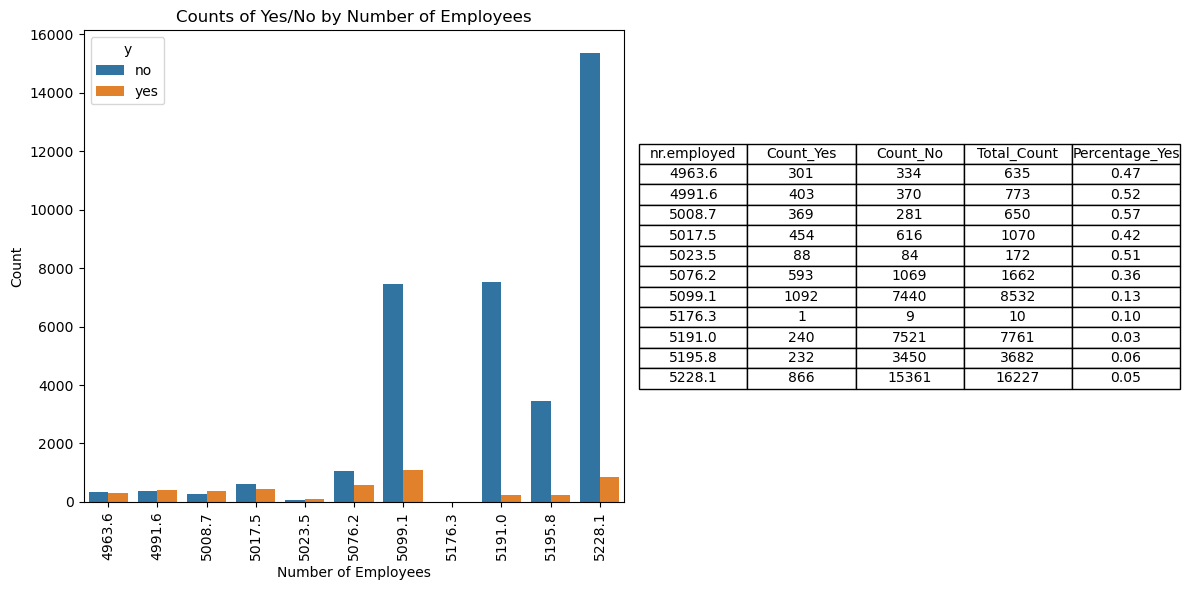

In [334]:
aggregations = {
    'Count_Yes': lambda x: (x == 'yes').sum(),
    'Count_No': lambda x: (x == 'no').sum(),
    'Total_Count': 'count',
    'Percentage_Yes': lambda x: (x == 'yes').sum() / x.count()
}


result = df.groupby('nr.employed')['y'].agg(**aggregations)


result = result.reset_index()


result['Percentage_Yes'] = result['Percentage_Yes'].apply(lambda x: f'{x:.2f}')


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))


sns.countplot(data=df, x='nr.employed', hue='y', ax=ax1)


ax1.set_xlabel('Number of Employees')
ax1.set_ylabel('Count')
ax1.set_title('Counts of Yes/No by Number of Employees')
ax1.tick_params(axis='x', rotation=90)  


ax2.axis('off')  
table = ax2.table(cellText=result.values, colLabels=result.columns, cellLoc='center', loc='center')


table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.2)


plt.tight_layout()
plt.show()

# Correlation between each variable

In [96]:
df_map = df.copy()

In [97]:
df_map

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,yes


In [98]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_map['job'] = le.fit_transform(df_map['job'])
df_map['marital'] = le.fit_transform(df_map['marital'])

In [99]:
df_map['marital'] = le.fit_transform(df_map['marital'])
df_map['education'] = le.fit_transform(df_map['education'])
df_map['default'] = le.fit_transform(df_map['default'])
df_map['housing'] = le.fit_transform(df_map['housing'])
df_map['loan'] = le.fit_transform(df_map['loan'])
df_map['month'] = le.fit_transform(df_map['month'])
df_map['day_of_week'] = le.fit_transform(df_map['day_of_week'])
df_map['contact'] = le.fit_transform(df_map['contact'])
df_map['y'] = le.fit_transform(df_map['y'])

In [100]:
df_map

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,0,0,0,1,6,1,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,1,0,1,6,1,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,1,1,6,1,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,1,0,0,7,0,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,1,0,0,7,0,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1


<AxesSubplot:>

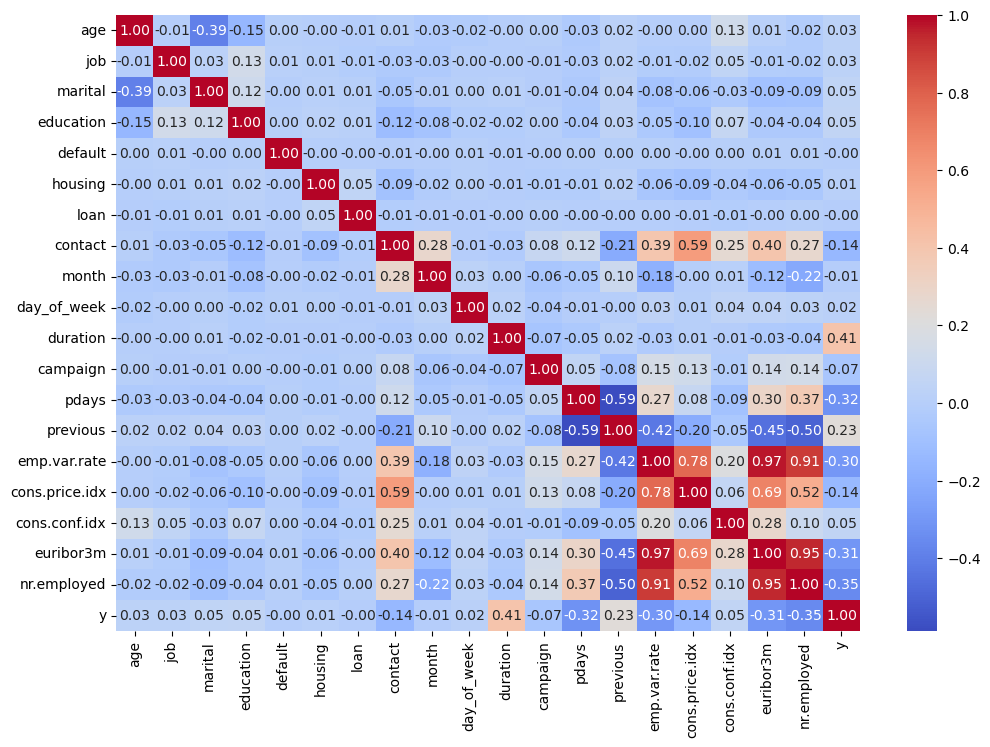

In [101]:
correlation_matrix = df_map.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

In [262]:
pearson_corr = df_map['pdays'].corr(df_map['y'])
pearson_corr  

-0.32494550709179276

In [263]:
pearson_corr = df_map['duration'].corr(df_map['y'])
pearson_corr  

0.40529177979501346

In [264]:
pearson_corr = df_map['campaign'].corr(df_map['y'])
pearson_corr  

-0.06637120120347116

highly correlated variables: nr.employed & euribor3m & emp.var.rate & (maybe) cons.price.idx

impact of pdays, duration, campaign:
pdays: negative impact on chance of purchase (pearson correlation: -0.32)

duration: positive impact on chance of purchase (pearson correlation: 0.41)

campaign: negative impact on chance of purchase but neglectable (pearson correlation: -0.07)

# Plots shape for numerical vairables

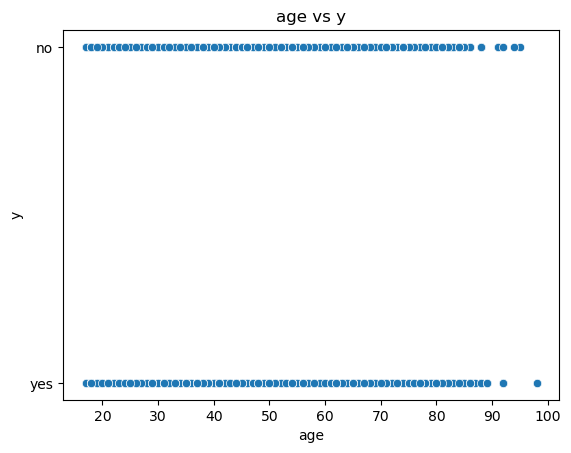

In [220]:
sns.scatterplot(data=df, x='age', y='y')

# Add labels and a title
plt.xlabel('age')
plt.ylabel('y')
plt.title('age vs y')

# Show the plot
plt.show()

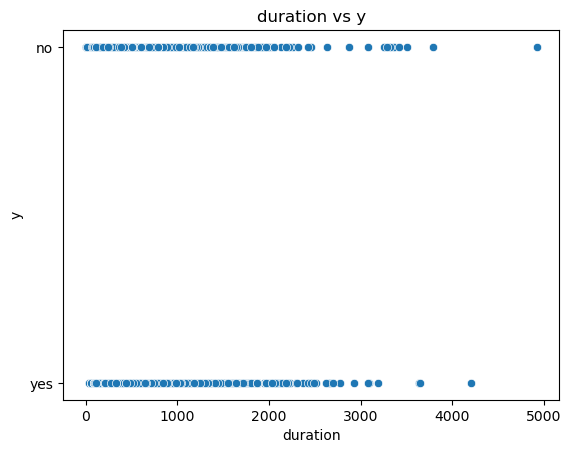

In [221]:
sns.scatterplot(data=df, x='duration', y='y')

# Add labels and a title
plt.xlabel('duration')
plt.ylabel('y')
plt.title('duration vs y')

# Show the plot
plt.show()

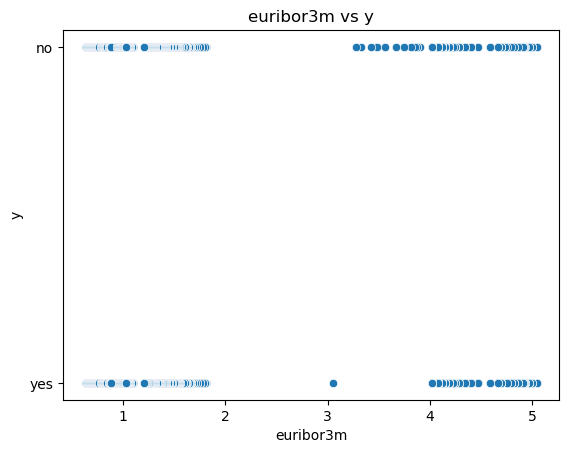

In [222]:
sns.scatterplot(data=df, x='euribor3m', y='y')

# Add labels and a title
plt.xlabel('euribor3m')
plt.ylabel('y')
plt.title('euribor3m vs y')

# Show the plot
plt.show()

# Final Reccomendation

# Customer with the following attribute has higher probability of purchasing the product :

1.greater than 60 years-old: While customers over an age of 60 isn't the majority, they have the highest possibility to purchasing this product (probabiltiy of purchase for customer under 60 is 10%, while it is 39% for customers 60 or older)

2.retired or student: customers who are retired (25% probability of purchase) or students  (31% probability of purchase) have the highest chance of purchase all job categories

3.single: customers who are single have a 14% probabiltiy of purchase, whereas both married and divorced have a 10% probability 

4.university degree:cusotmers with a university degree in their education have a 14% probability of purchase. It is the highest among all education categories excluding illiterate. However, illiterate only has a total count of 19, so it's not appropriate to consider them. 

5.has cellular as contact method: customers that has cellular as contact method has a 15% chance of purchase, which is significantly higher than the 5% purhcase chance of customers who has telephone has their contact method.



# In regards to their participation of campaign, customers are more likely to purchase the product if they: 


1.High number of contacts performed before this campaign(previous): the probability of purchase increases as the number of contacts performed increases in general

2.positive experience with the previous campign(poutcome): customers labeled 'success' in 'poutcome' column has a 65% chance of purchasing the product

3.contacted at least once since their last contact from a previous campaign(pdays): While the frequency of contact since the customers last contact from a previous campaign doesn't have much impact on their chance of purchasing the product, customers who have never been contacted has significantly lower chance of purchasing the product.



# The following factors can have impact on the probability of purchase:

1.Number of employees: The higher the total number of people employed, the lower the probability of purchase for this product

2.Employment variation rate: The higher the rate, the lower the probability of purchase for this product

3.Consumer price index: The CPI has negative but weak correlation with the possibilty of purchase (pearson correlation: -0.14)

4.Consumer confidence index: The consumer confidence index has a positive but weak correlation with the possibilty of purchase(pearson correlation: 0.05)

5.Euribor-3-month-rate (interest rate at which a selection of European banks lend one another funds denominated in euros): negative correlation with the possibilty of purchase (pearson correlation:-0.31)